Name-Vatsal Gupta
Hamoye_ID- 154e728bb4c1f000
Importing the Required Libraries

In [29]:
import pandas as pd 
#pandas for data manipulation

In [30]:
import numpy as np 
#importing the data set 

df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [31]:
import matplotlib.pyplot as plt 
#mayplotlib for visual representation

In [32]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [33]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [34]:
df.nunique()

FullDate     92016
Tmax           328
SysLoad      91933
GasPrice      2128
ElecPrice    31855
dtype: int64

In [35]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [36]:
df["FullDate"] = pd.to_datetime(df["FullDate"])
df.set_index("FullDate", inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [37]:
df2 = df.resample('D').sum()
df2.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [38]:
df2.tail()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495
2021-02-27,564.0,4932.88015,130.0800,488.980
2021-02-28,583.2,6675.05485,131.6352,-98.985


Getting the coorelation betweem teh features of teh data set

In [39]:
df2.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
ElecPrice,0.004748,0.170524,0.352420,1.000000


 11



Text(0, 0.5, 'ElecPrice')

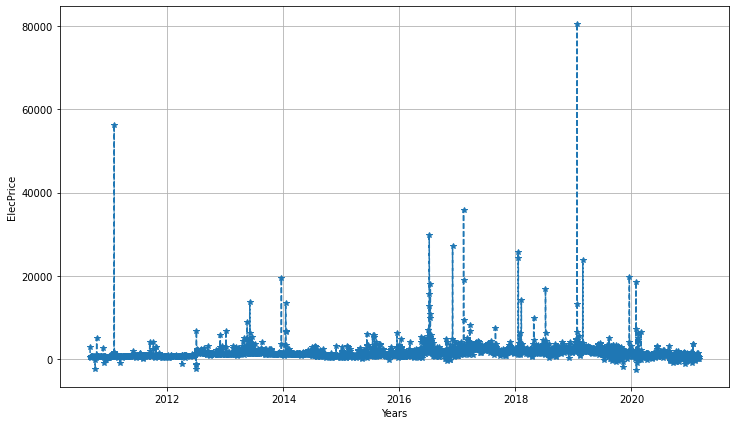

In [40]:
plt.figure(figsize=(12, 7))
plt.plot(df2.index, df2.ElecPrice, '--', marker= '*')
plt.grid()
plt.xlabel('Years')
plt.ylabel('ElecPrice')

12

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
result = adfuller(df2["SysLoad"], autolag='AIC')
print(f"sysload{round(result[1], 6)}")

sysload0.004254


In [43]:
result1 = adfuller(df2["GasPrice"], autolag='AIC')
print(f"GasPrice = {round(result1[1], 6)}")

GasPrice = 0.045027


13



In [44]:
for key, value in result[4].items():
    print('Critial:-')
    print('value are:-')    
    print(f'{key}, {round(value, 4)}') 

Critial:-
value are:-
1%, -3.4321
Critial:-
value are:-
5%, -2.8623
Critial:-
value are:-
10%, -2.5672


For Questions 14 - 16

In [45]:
!pip install pystan~=2.14


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from fbprophet import Prophet

In [48]:
df2.reset_index(inplace=True)

# x = len(new_df.index)



In [49]:
df_uni = df2[["FullDate", "ElecPrice"]]
new_df = df_uni.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

In [50]:
new_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


model preparation

In [51]:
model = Prophet()

preparing the dataset for training and testing as well

In [52]:
# x = len(new_df.index)
x_train = new_df.head(2757) #training data
x_test = new_df[-(x-2757):]# testing data

In [53]:
x_test.head()

,ds,y
2757,2018-03-20,1833.00
2758,2018-03-21,1730.49
2759,2018-03-22,2260.55
2760,2018-03-23,2138.76
2761,2018-03-24,1721.70


Training the model

In [54]:
model.fit(x_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
future = model.make_future_dataframe(periods=(x-2757), freq='D')
result_u = model.predict(future)

In [56]:
result_u.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1523.587615,3417.399198,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1435.479408,3392.998404,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1216.767469,3159.193452,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1921.385037,2828.568686,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-1930.173014,2552.461690,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845


In [57]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round((np.mean(np.abs((y_true - y_pred) / y_true)) * 100), 2)

 14




In [58]:
mean_absolute_percentage_error(x_test['y'], result_u['yhat'][-(x-2757):])

549.48

 15



In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = round(sqrt(mean_squared_error(x_test['y'], result_u['yhat'][-(x-2757):])), 2)
rmse

3218.16

 16


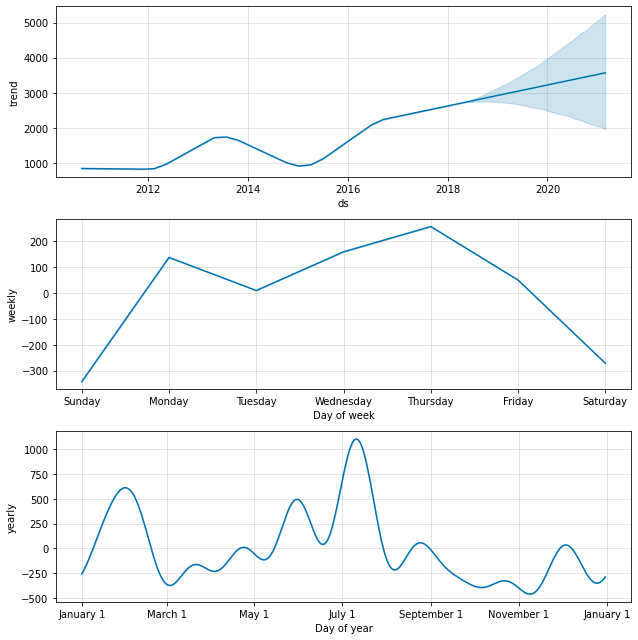

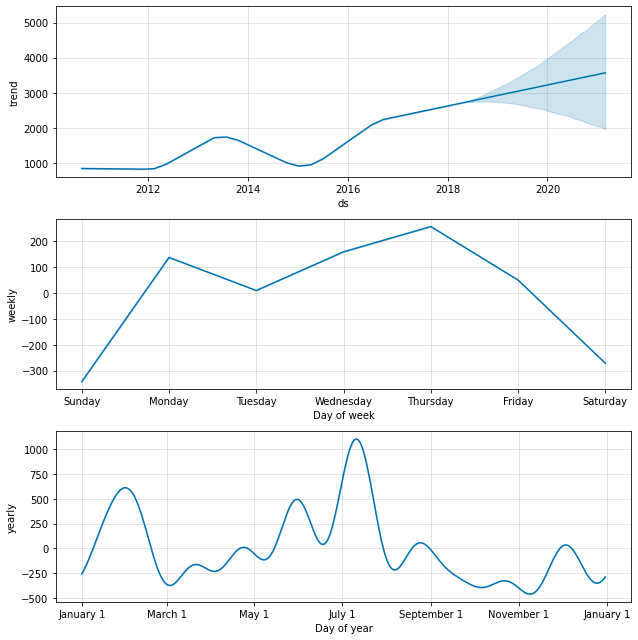

In [60]:
model.plot_components(result_u)

hence we can see that it is Highest at july

 For questions 17 - 19

In [61]:
df_mul = df2.rename(columns={"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax": "add2", "GasPrice": "add3"})
df_mul.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [62]:
x_train_mul = df_mul.head(2757)
x_test_mul = df_mul[-(x-2757):]

In [63]:
x_train_mul.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [64]:
model_mul = Prophet()
model_mul.add_regressor('add1')
model_mul.add_regressor('add2')
model_mul.add_regressor('add3')

In [65]:
model_mul.fit(x_train_mul)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
future_mul = model_mul.make_future_dataframe(periods=(x-2757),freq='D')
future_mul['add1'] = df_mul['add1'].values
future_mul['add2'] = df_mul['add2'].values
future_mul['add3'] = df_mul['add3'].values
result_mul= model_mul.predict(future_mul)

In [68]:
result_mul.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,981.533196,-730.439243,3692.329683,981.533196,981.533196,1038.685076,1038.685076,1038.685076,0.252403,...,42.515562,42.515562,42.515562,-4.132072,-4.132072,-4.132072,0.0,0.0,0.0,1503.264751
1,2010-09-02,982.087614,-741.204876,3651.089094,982.087614,982.087614,889.475204,889.475204,889.475204,0.253271,...,145.604343,145.604343,145.604343,-7.007355,-7.007355,-7.007355,0.0,0.0,0.0,1454.823664
2,2010-09-03,982.642032,-387.326427,3910.670902,982.642032,982.642032,1044.302291,1044.302291,1044.302291,0.246976,...,-44.332801,-44.332801,-44.332801,-9.942955,-9.942955,-9.942955,0.0,0.0,0.0,1684.281982
3,2010-09-04,983.196451,-1199.561475,3147.958105,983.196451,983.196451,706.996565,706.996565,706.996565,0.256961,...,-117.513591,-117.513591,-117.513591,-12.669044,-12.669044,-12.669044,0.0,0.0,0.0,899.300617
4,2010-09-05,983.750869,-868.797645,3410.385207,983.750869,983.750869,705.503845,705.503845,705.503845,0.254356,...,-69.467438,-69.467438,-69.467438,-14.943022,-14.943022,-14.943022,0.0,0.0,0.0,1316.465049


17

In [69]:
mean_absolute_percentage_error(x_test_mul['y'], result_mul['yhat'][-(x-2757):])

231.28

18

In [70]:
rmse = round(sqrt(mean_squared_error(x_test_mul['y'], result_mul['yhat'][-(x-2757):])), 2)
rmse

2706.92

19

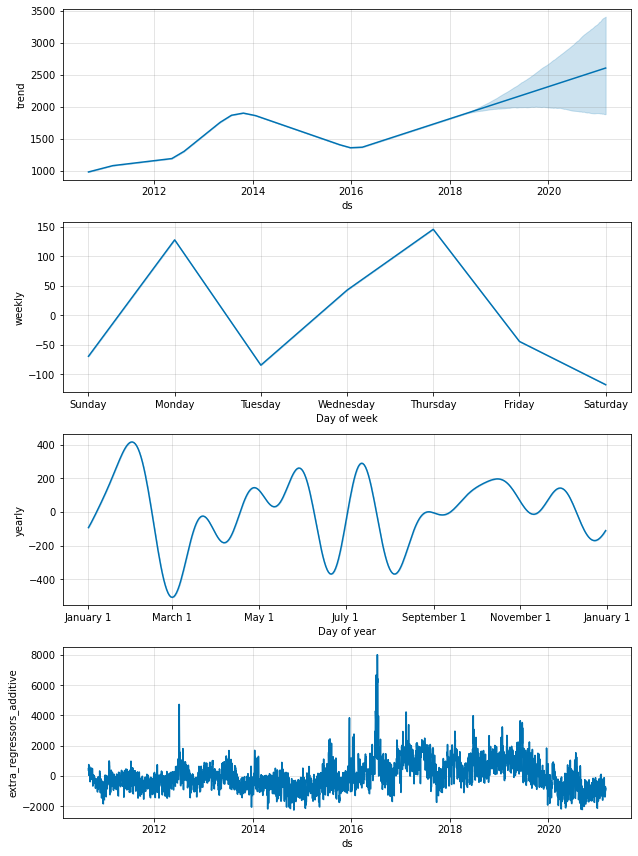

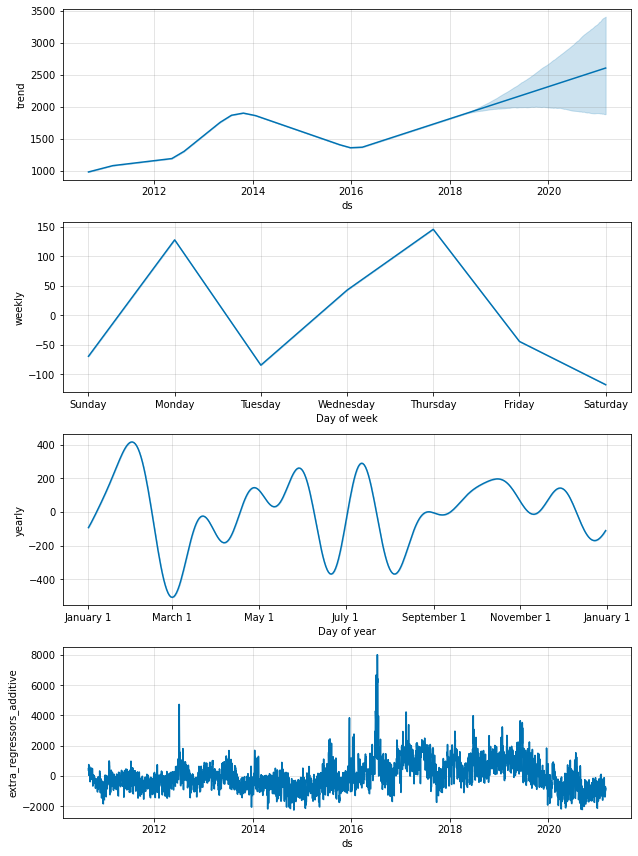

In [71]:
model_mul.plot_components(result_mul)

hence we can see that it is Highest at Thursday

20

In [72]:
df_mul_var_2 = df2.rename(columns={"FullDate": "ds", "ElecPrice": "y", "SysLoad": "add1", "Tmax": "add2", "GasPrice": "add3"})
df_mul_var_2.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [73]:

new_df_2 = df_mul_var_2.drop(['add2'], axis=1)


In [75]:
new_df_2.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


preapring test train data from dataset

In [76]:
x_train_mul_var_2 = new_df_2.head(2757)
x_test_mul_var_2 = new_df_2[-(x-2757):]

In [77]:
x_train_mul_var_2.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [78]:
model_mul_var_2 = Prophet()
model_mul_var_2.add_regressor('add1')
model_mul_var_2.add_regressor('add3')

In [79]:
model_mul_var_2.fit(x_train_mul_var_2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
future_mul_var_2 = model_mul_var_2.make_future_dataframe(periods=(x-2757),freq='D')
future_mul_var_2['add1'] = new_df_2['add1'].values
future_mul_var_2['add3'] = new_df_2['add3'].values
result_mul_var_2= model_mul_var_2.predict(future_mul_var_2)

In [82]:
result_mul_var_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,982.887644,-843.582357,3868.355764,982.887644,982.887644,1038.715825,1038.715825,1038.715825,-555.696887,...,42.767881,42.767881,42.767881,-3.963670,-3.963670,-3.963670,0.0,0.0,0.0,1504.710793
1,2010-09-02,983.504110,-834.608641,3567.093047,983.504110,983.504110,889.501536,889.501536,889.501536,-555.696887,...,145.302341,145.302341,145.302341,-6.859202,-6.859202,-6.859202,0.0,0.0,0.0,1455.751898
2,2010-09-03,984.120576,-577.470929,3841.166030,984.120576,984.120576,1044.333207,1044.333207,1044.333207,-288.689395,...,-44.086683,-44.086683,-44.086683,-9.807052,-9.807052,-9.807052,0.0,0.0,0.0,1685.870653
3,2010-09-04,984.737042,-1175.334849,3249.001005,984.737042,984.737042,707.017495,707.017495,707.017495,-661.094581,...,-117.847877,-117.847877,-117.847877,-12.537108,-12.537108,-12.537108,0.0,0.0,0.0,900.274970
4,2010-09-05,985.353508,-979.401881,3482.728443,985.353508,985.353508,705.524731,705.524731,705.524731,-288.689395,...,-69.265132,-69.265132,-69.265132,-14.806755,-14.806755,-14.806755,0.0,0.0,0.0,1318.116957


In [83]:
mean_absolute_percentage_error(x_test_mul_var_2['y'], result_mul_var_2['yhat'][-(x-2757):])

233.72